## Step 3 - Climate Analysis and Exploration

In [1]:
import pandas as pd                                                          # pandas library

In [2]:
import numpy as np                                                           # numpy library

In [3]:
import matplotlib.pyplot as plt                                              # pyplot module from matplotlib library

In [4]:
import seaborn as sns                                                        # seaborn library

In [5]:
import sqlalchemy                                                            # SQL Alchemy dependencies
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [6]:
sns.set()                                                                    # switches to seaborn default display

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")                            # creates SQLite engine

In [8]:
Base = automap_base()                                                        # automaps and reflects database
Base.prepare(engine, reflect=True)

In [9]:
conn = engine.connect()                                                      # connects to database
inspector = inspect(engine)                                                  # initializes inspector

In [10]:
Base.classes.keys()                                                          # inspects database

['measurement', 'station']

In [11]:
Measurement = Base.classes.measurement                                       # creates class for each table
Station = Base.classes.station

In [12]:
session = Session(engine)                                                    # initializes session

### Precipitation Analysis

In [40]:
# queries the database for previous years precipitation data.
precip_analysis = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()

In [41]:
precip_df = pd.DataFrame(precip_analysis)                                    # loads query results => dataframe

In [42]:
precip_df['date'] = pd.to_datetime(precip_df['date'])                        # converts date to datetime object

In [43]:
precip_df = precip_df.set_index('date')                                      # reindexes dataframe by date
precip_df.rename(columns = {'prcp': 'precipitation'}, inplace=True)          # renames column for legend
precip_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


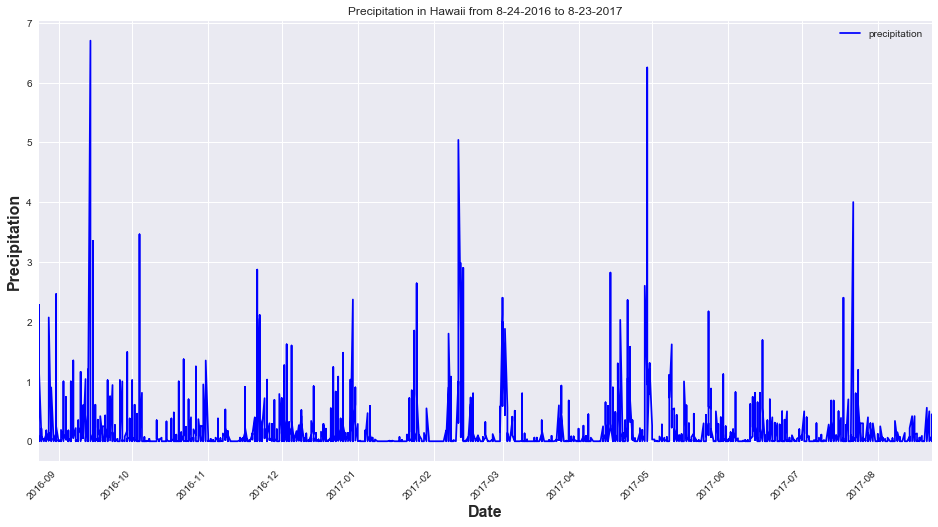

In [47]:
# plots the data
precip_plot = precip_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=16, weight='bold')
plt.title("Precipitation in Hawaii from 8-24-2016 to 8-23-2017")
plt.show()

In [45]:
precip_df.describe()                                                         # summary statistics

,precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis

In [27]:
## Start Station Analysis
station_num = session.query(Station.id).count()
station_num

9

In [28]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
most_active_station = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [29]:
#Waihee 837.5 has the highest number of observations
most_active_station

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [30]:
waihee_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()

In [31]:
len(waihee_tobs)

352

In [32]:
print(waihee_tobs[0][0])

77


In [33]:
temperatures = [temp[0] for temp in waihee_tobs]

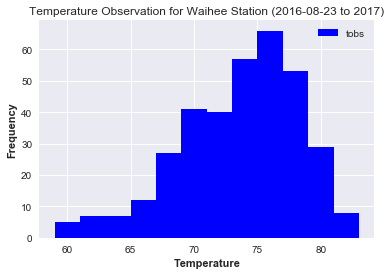

In [34]:
plt.hist(temperatures, bins=12, color='b')
plt.title("Temperature Observation for Waihee Station (2016-08-23 to 2017)")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)
plt.show()

### Temperature Analysis

In [35]:
def calc_temps(start, end):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    lowest_temp = min(temperatures)
    highest_temp = max(temperatures)
    

    plt.figure(figsize=(3,5))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='salmon')
    plt.ylabel("Temperature", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.show()

In [36]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


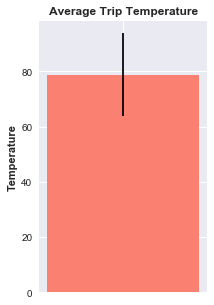

In [37]:
calc_temps(start="2017-08-07", end="2017-08-23")

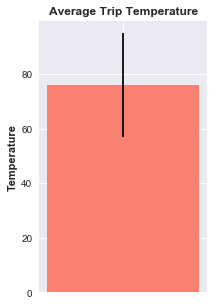

In [38]:
calc_temps(start="2013-08-12", end="2013-09-12")